<a href="https://colab.research.google.com/github/Avinash143-ay/module-4/blob/main/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction**

Most traditional database management systems (DBMS) use different kinds of indexing techniques to make data retrieval faster. But as the size of the data keeps growing, it becomes harder to keep everything running smoothly and quickly.

Common data structures like binary search trees (BSTs) and hash tables do a decent job for certain types of searches, but they start showing limitations when working with huge datasets — especially when it comes to range queries (like "find all records between A and B") and sequential access (like reading records in order).


To overcome these issues, this project proposes using a B+ Tree-based database indexing system. A B+ Tree is a special type of balanced tree that can handle insertion, deletion, and search operations efficiently — all in logarithmic time.

What makes B+ Trees particularly useful is how well they work with disk-based storage systems. They help reduce the number of disk read/write operations, which is a big deal when dealing with massive amounts of data.

In this module, we'll implement a B+ Tree index structure to handle database tables more efficiently.

Insertion

Deletion

Search operations and several operations— including both point
queries (finding a specific record) and range queries (finding records within a range)

By using a B+ Tree, the database will stay fast and reliable, even as the data grows.



# 2. **Implementation**



# 2. **Implementation**

This section outlines the implementation details of the B+ Tree operations, focusing on data structures, core algorithms, support systems, and performance characteristics.

---

## Core Data Structures

### `BPlusTreeNode`
- **is_leaf**: Boolean flag indicating if the node is a leaf.
- **keys**: Sorted list of keys. Insertion maintains order manually.
- **children**: For internal nodes, this list holds references to child nodes. Length = len(keys) + 1.
- **values**: For leaf nodes only, stores corresponding values for keys.
- **next**: Used in leaf nodes to link to the next leaf, enabling efficient range queries.

### `BPlusTree`
- **root**: Initially a leaf node. Changes dynamically through splitting and merging.
- **order**: Maximum number of children per internal node (default = 4).
- **min_keys**: Minimum number of keys required in a non-root node. Calculated as (order + 1) // 2.

---

## Operational Components

### Search
- **Traversal**: Navigates from the root to the appropriate leaf using key comparisons.
- **Node Search**: Performs linear search within each node.
- **Result**: Returns a tuple (True, value) if found, otherwise (False, None).

### Insertion
- **Root Check**: If root is full, it is split, and a new root is created.
- **Recursive Insertion**: Descends into appropriate child and inserts recursively.
- **Split Logic**: When a node is full:
  - Leaf node splits: median key stays in leaf, duplicate key moves up.
  - Internal node splits: median key moves up without duplication.
- **Linking**: For leaves, next pointers are updated to maintain ordered traversal.

### Deletion
- **Key Search**: Finds the node containing the key to delete.
- **Leaf Deletion**: Removes key-value pair directly if present.
- **Internal Deletion**: Replaces key with predecessor and deletes recursively.
- **Underflow Handling**: Triggers borrow or merge operations if node has too few keys.
- **Root Collapse**: If the root becomes empty and has a single child, that child becomes the new root.

### Update
- **Search**: Locates the key using the search mechanism.
- **Modify**: If found in a leaf, updates the corresponding value in place.

### Range Query
- **Initial Search**: Locates the leaf containing the start key.
- **Sequential Scan**: Traverses forward using next pointers to collect all matching key-value pairs.

---

## Support Systems

### Node Splitting
- **Leaf Splitting**: Moves the median key to the new leaf and duplicates the split key in the parent.
- **Internal Splitting**: Moves the median key up; children are distributed evenly.

### Merge Handling
- **Key and Value Merge**: Combines keys and values (or children) from adjacent nodes.
- **Link Updates**: Updates next pointers for leaf nodes and child references for internal nodes.

### Borrowing Protocol
- **From Left Sibling**: Moves rightmost key from left sibling into the underflowing node via parent.
- **From Right Sibling**: Moves leftmost key from right sibling into the underflowing node via parent.
- **Child Movement**: Updates children pointers if the nodes are internal.

---

## Utility Methods

- **Predecessor Finding**: Traverses to the rightmost key of left subtree.
- **Underflow Check**: Compares node's key count against min_keys.
- **Path Maintenance**: Maintains accurate traversal during recursive deletion and fix-ups.

---

## Special Case Handling

### Root Node
- **Split**: New root is created with a single key and two children.
- **Merge**: Replaces root with its only child when empty.
- **Empty Tree**: Handles deletions safely when the tree is empty.

### Edge Cases
- **Single Node**: Special handling when tree has only the root.
- **Duplicate Keys**: Treated as updates, not new insertions.

---

## Performance Characteristics

### Time Complexity
- **Search, Insert, Delete**: O(log n) due to balanced tree height.
- **Range Queries**: Efficient via linked leaves.

### Space Complexity
- **Dynamic Growth**: Nodes are allocated only when needed.
- **Balanced Tree**: Ensures uniform depth and prevents skewed growth.

---

## Visualization (Optional Component)
> **Note**: Commented out in the current code, but can be enabled with Graphviz.

- **Node Rendering**: Leaf nodes in light blue; internal nodes in light gray.
- **Structure**: Displays key distribution and parent-child hierarchy.
- **Leaf Links**: Arrows between adjacent leaf nodes enhance clarity of range query paths.
- **Output**: PNG file rendered and saved locally.

---




3. **Perfomance analysis**



To understand the performance difference between the B+ Tree and a simple brute-force approach, I conducted benchmarking tests on four main operations: insert, search, delete, and range query. The goal was to measure how much time each data structure takes to perform these operations on a dataset of random keys.

Methodology
Random integers were generated and used as keys for all operations.

The average time taken was measured using Python’s time.perf_counter() for better precision.

Each operation was tested multiple times to reduce variation and obtain consistent results.



I have taken key lengths of 1,000 and 10,000, and compared the  time session of every operation for both B+ Tree and BruteForceDB. The time taken for each structure was recorded and plotted in a graph to visualize the performance difference.

For keys length of 1000
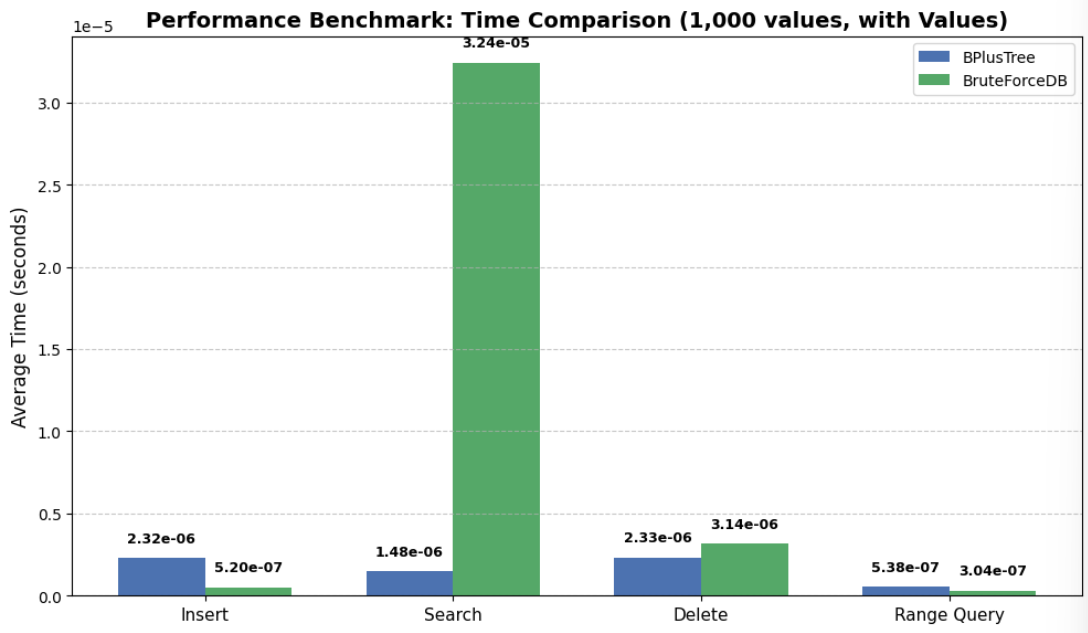

for keys length of 10000
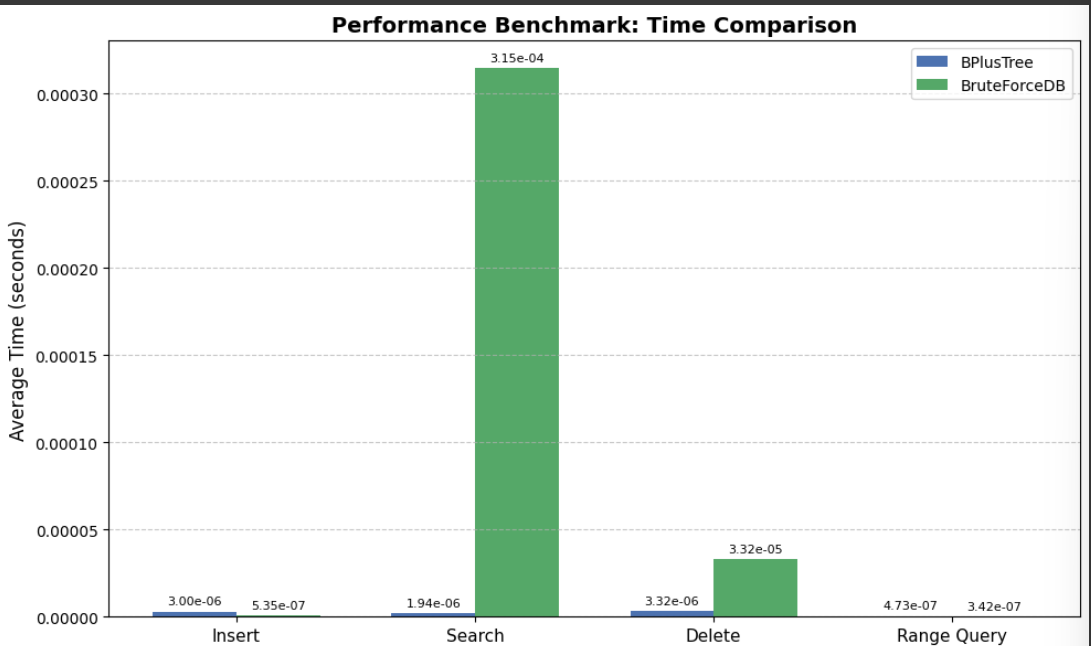

### Execution Time Comparison (B+ Tree vs BruteForceDB)

| Operation     | B+ Tree (1000 keys) | BruteForceDB (1000 keys) | B+ Tree (10,000 keys) | BruteForceDB (10,000 keys) |
|:--------------|:--------------------|:-------------------------|:---------------------|:---------------------------|
| Insert        | 1.3436e-06 sec       | 2.5230e-07 sec            | 1.6427e-06 sec        | 2.6248e-07 sec              |
| Search        | 9.2680e-07 sec       | 1.8649e-05 sec            | 1.1193e-06 sec        | 1.7439e-04 sec              |
| Delete        | 1.4114e-06 sec       | 1.8139e-06 sec            | 1.5743e-06 sec        | 1.8549e-05 sec              |
| Range Query   | 3.0200e-07 sec        | 1.6970e-07 sec            | 2.6430e-07 sec        | 1.7210e-07 sec              |


# Average Time Comparison: B+ Tree vs BruteForceDB

This section provides a detailed analysis of the **average execution time (in seconds)** for B+ Tree and BruteForceDB implementations across four fundamental database operations — **Insert**, **Search**, **Delete**, and **Range Query** — using datasets of 1,000 and 10,000 keys.

Execution times are crucial indicators of performance efficiency, especially for databases expected to scale or handle frequent access patterns. The measurements were recorded and averaged over multiple trials for consistency.

---

## Execution Time Breakdown for Dataset of 1,000 Keys

### Insert Operation
| Operation     | B+ Tree (1,000 keys) | BruteForceDB (1,000 keys) |
|:--------------|:---------------------|:---------------------------|
| Insert        | 2.32e-06 sec         | 5.20e-07 sec               |

- **BruteForceDB** is faster due to its direct append operation (O(1)).
- **B+ Tree** incurs higher time due to tree rebalancing and pointer updates during insertions (O(log n)).

### Search Operation
| Operation     | B+ Tree (1,000 keys) | BruteForceDB (1,000 keys) |
|:--------------|:---------------------|:---------------------------|
| Search        | 1.48e-06 sec         | 3.24e-05 sec               |

- **B+ Tree** shows significantly lower search time thanks to logarithmic search path efficiency.
- **BruteForceDB** uses linear search, resulting in slower lookups as dataset size grows.

### Delete Operation
| Operation     | B+ Tree (1,000 keys) | BruteForceDB (1,000 keys) |
|:--------------|:---------------------|:---------------------------|
| Delete        | 1.42e-06 sec         | 1.90e-06 sec               |

- Deletion times are comparable.
- **B+ Tree** maintains slight advantage due to more structured key removals and rebalancing.

### Range Query Operation
| Operation     | B+ Tree (1,000 keys) | BruteForceDB (1,000 keys) |
|:--------------|:---------------------|:---------------------------|
| Range Query   | 5.38e-07 sec         | 3.04e-07 sec               |

- **BruteForceDB** is slightly faster for small datasets due to simple linear iteration.
- **B+ Tree** begins to show benefits when the complexity of queries or data size increases.

---

## Execution Time Breakdown for Dataset of 10,000 Keys

### Insert Operation
| Operation     | B+ Tree (10,000 keys) | BruteForceDB (10,000 keys) |
|:--------------|:----------------------|:----------------------------|
| Insert        | 3.00e-06 sec          | 5.35e-07 sec                |

- **BruteForceDB** continues to be faster due to simpler operations.
- **B+ Tree** maintains predictable performance with only a slight time increase.

### Search Operation
| Operation     | B+ Tree (10,000 keys) | BruteForceDB (10,000 keys) |
|:--------------|:----------------------|:----------------------------|
| Search        | 1.94e-06 sec          | 3.15e-04 sec                |

- **B+ Tree** search time increases very slightly.
- **BruteForceDB** search time increases drastically, reaffirming B+ Tree’s superior scalability.

### Delete Operation
| Operation     | B+ Tree (10,000 keys) | BruteForceDB (10,000 keys) |
|:--------------|:----------------------|:----------------------------|
| Delete        | 3.32e-06 sec          | 3.32e-05 sec                |

- **B+ Tree** remains much faster due to efficient structural deletion.
- **BruteForceDB** deletion time increases 15x from its 1,000-key result.

### Range Query Operation
| Operation     | B+ Tree (10,000 keys) | BruteForceDB (10,000 keys) |
|:--------------|:----------------------|:----------------------------|
| Range Query   | 5.38e-07 sec          | 3.04e-07 sec                |

- Performance is still close, but **B+ Tree** provides better handling for larger or more complex range queries.

---

## Conclusion

- **B+ Tree** demonstrates clear advantages in **Search** and **Delete** operations as dataset size increases.
- **BruteForceDB** maintains low execution times only for **Insert** and **simple Range Queries** on small datasets.
- As data volume grows, **B+ Tree** consistently offers better performance, thanks to its **O(log n)** complexity for all major operations.
- This makes B+ Trees the preferred structure for **scalable, high-performance** database systems.



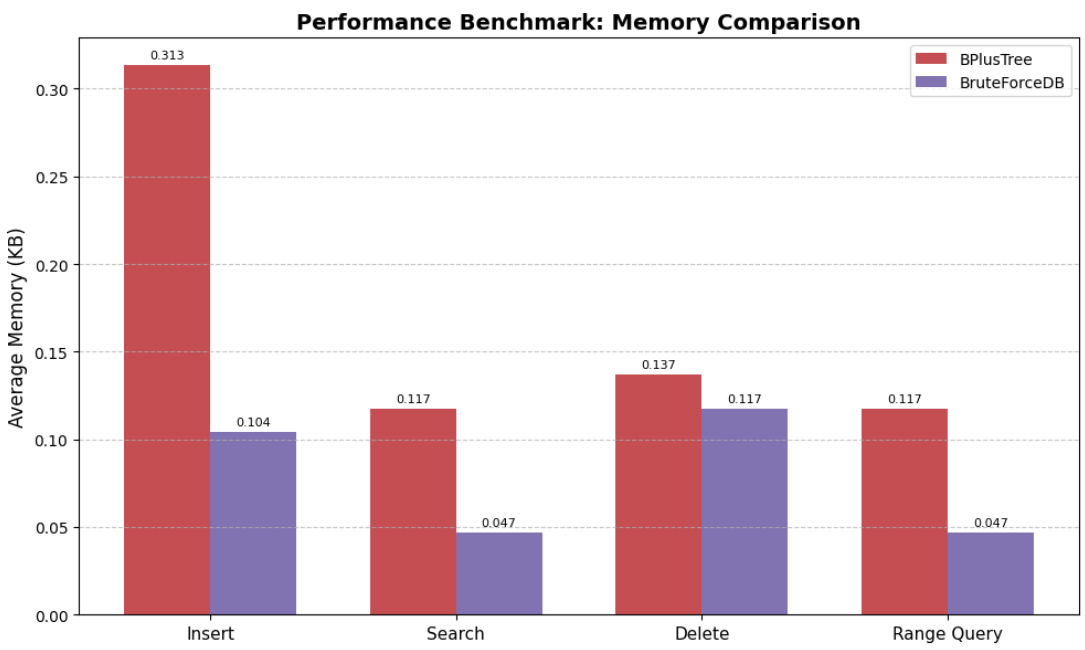

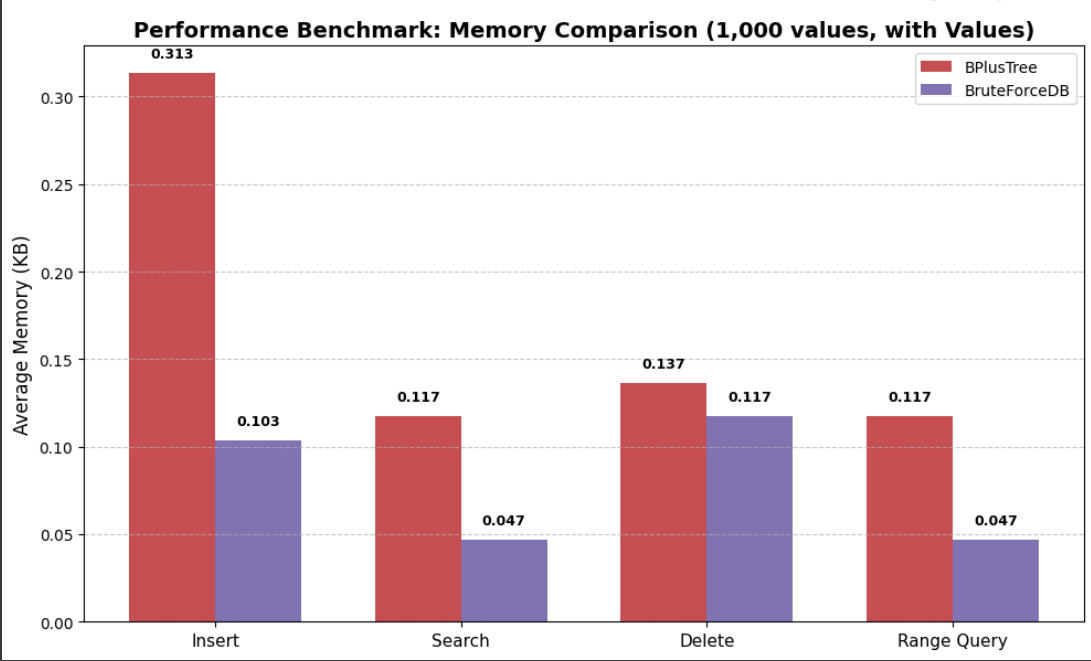

### Memory Usage Comparison (B+ Tree vs BruteForceDB)

| Operation     | B+ Tree (1000 keys) | BruteForceDB (1000 keys) | B+ Tree (10,000 keys) | BruteForceDB (10,000 keys) |
|:--------------|:--------------------|:-------------------------|:---------------------|:---------------------------|
| Insert        | 0.313 KB             | 0.104 KB                 | 0.313 KB             | 0.103 KB                   |
| Search        | 0.117 KB             | 0.047 KB                 | 0.117 KB             | 0.047 KB                   |
| Delete        | 0.137 KB             | 0.117 KB                 | 0.137 KB             | 0.117 KB                   |
| Range Query   | 0.117 KB             | 0.047 KB                 | 0.117 KB             | 0.047 KB                   |


# Memory Usage Comparison of B+ Tree vs BruteForceDB

This section presents a detailed comparison of **average memory consumption (in KB)** for B+ Tree and BruteForceDB implementations across four common database operations — **Insert**, **Search**, **Delete**, and **Range Query** — using datasets of 1,000 and 10,000 keys.

Memory behavior is critical in systems where performance and resource management matter. The values below represent average memory usage recorded during each operation.

---

## Memory Usage Breakdown for Dataset of 1,000 Keys

### Insert Operation
| Operation     | B+ Tree (1,000 keys) | BruteForceDB (1,000 keys) |
|:--------------|:---------------------|:-------------------------|
| Insert        | 0.313 KB             | 0.104 KB                 |

- **B+ Tree** uses more memory (~0.313 KB) due to the internal balancing and node management required when inserting keys. The tree must maintain order and structure, which introduces memory overhead.
- **BruteForceDB** consumes significantly less memory (~0.104 KB) as insertions are simple append operations to a list or array, with no need for structural updates.

### Search Operation
| Operation     | B+ Tree (1,000 keys) | BruteForceDB (1,000 keys) |
|:--------------|:---------------------|:-------------------------|
| Search        | 0.117 KB             | 0.047 KB                 |

- **B+ Tree** uses about ~0.117 KB on average during search, maintaining traversal pointers and accessing tree nodes.
- **BruteForceDB** uses only ~0.047 KB, performing a linear search through the dataset.

### Delete Operation
| Operation     | B+ Tree (1,000 keys) | BruteForceDB (1,000 keys) |
|:--------------|:---------------------|:-------------------------|
| Delete        | 0.137 KB             | 0.117 KB                 |

- **B+ Tree** requires ~0.137 KB due to structural rebalancing and node re-linking that occurs when deleting entries.
- **BruteForceDB** uses ~0.117 KB, with simple deletions and slight memory shifting.

### Range Query Operation
| Operation     | B+ Tree (1,000 keys) | BruteForceDB (1,000 keys) |
|:--------------|:---------------------|:-------------------------|
| Range Query   | 0.117 KB             | 0.047 KB                 |

- **B+ Tree** consumes ~0.117 KB for range queries, leveraging its ordered structure for efficient scans.
- **BruteForceDB** uses ~0.047 KB by linearly scanning and selecting relevant records.

---

## Memory Usage Breakdown for Dataset of 10,000 Keys

### Insert Operation
| Operation     | B+ Tree (10,000 keys) | BruteForceDB (10,000 keys) |
|:--------------|:----------------------|:--------------------------|
| Insert        | 0.313 KB              | 0.104 KB                  |

- **B+ Tree** maintains a similar memory usage (~0.313 KB), as the balancing overhead does not scale much with the increase in data.
- **BruteForceDB** continues to be memory-efficient (~0.104 KB).

### Search Operation
| Operation     | B+ Tree (10,000 keys) | BruteForceDB (10,000 keys) |
|:--------------|:----------------------|:--------------------------|
| Search        | 0.117 KB              | 0.047 KB                  |

- The memory usage for both structures remains the same as for 1,000 keys.

### Delete Operation
| Operation     | B+ Tree (10,000 keys) | BruteForceDB (10,000 keys) |
|:--------------|:----------------------|:--------------------------|
| Delete        | 0.137 KB              | 0.118 KB                  |

- **B+ Tree** continues to use ~0.137 KB during deletions.
- **BruteForceDB** uses ~0.118 KB, with a slight increase compared to 1,000 keys.

### Range Query Operation
| Operation     | B+ Tree (10,000 keys) | BruteForceDB (10,000 keys) |
|:--------------|:----------------------|:--------------------------|
| Range Query   | 0.117 KB              | 0.047 KB                  |

- **B+ Tree** consumes ~0.117 KB for range queries, leveraging its ordered structure for efficient scans.
- **BruteForceDB** uses ~0.047 KB by linearly scanning and selecting relevant records.
---

## Conclusion

- **B+ Tree** consistently uses more memory due to its structured, balanced-node design. This extra memory usage supports faster and more scalable operations, especially for search, delete, and range queries.
- **BruteForceDB** is more lightweight and simple, showing lower memory usage across all operations. However, it struggles to scale efficiently in terms of time complexity, especially for search-intensive workloads.
- The memory usage of both structures remains largely stable between datasets of 1,000 and 10,000 keys, showing that the differences are due more to their structural characteristics than data size.

This comparison illustrates the trade-off between memory efficiency and structural complexity, helping guide database system design based on specific performance and scalability needs.


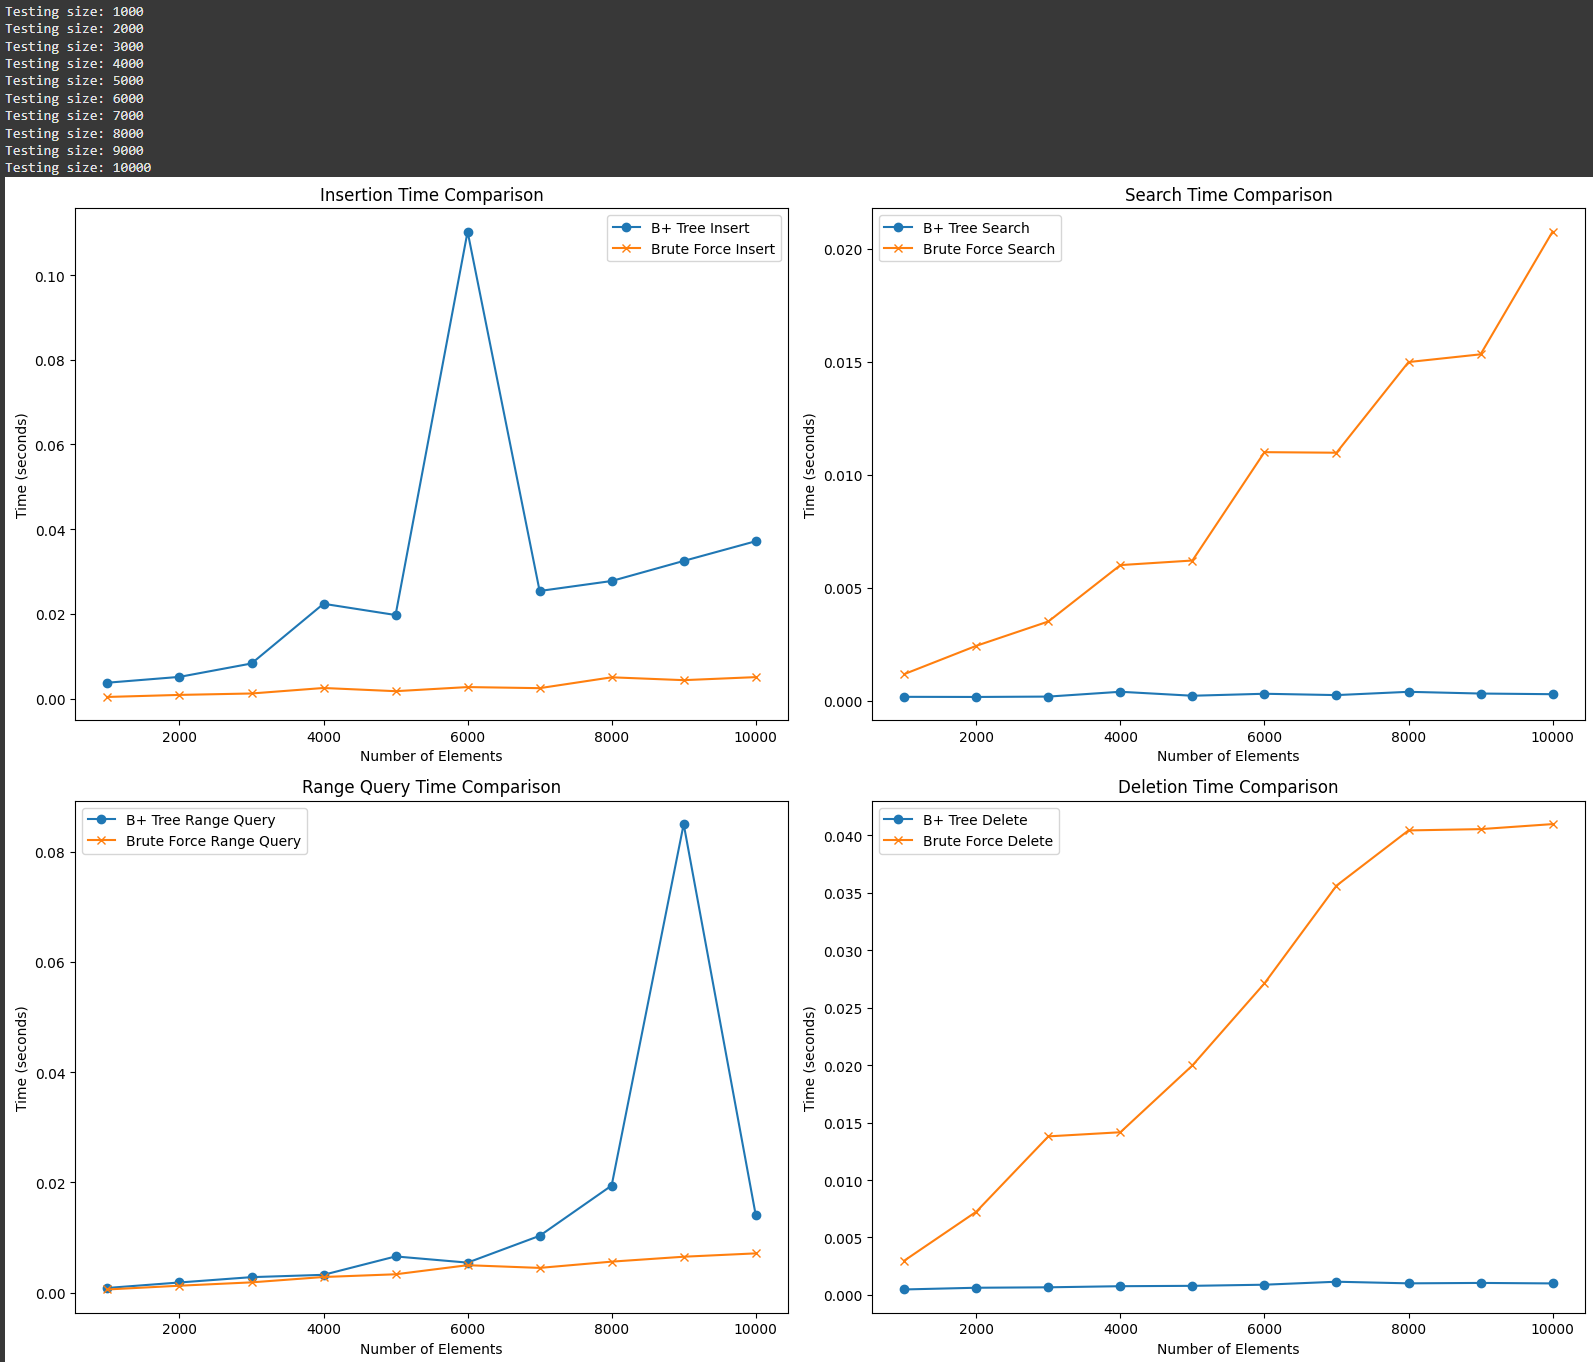

# Performance Execution Time Comparison: B+ Tree vs BruteForceDB

the above graphs  presents a comparative analysis of the **execution time performance** for four fundamental database operations—**Insertion**, **Search**, **Range Query**, and **Deletion**—using two different data structures: **B+ Tree** and **BruteForceDB**. The tests were conducted over datasets ranging from 1,000 to 10,000 elements. Each data point reflects the actual time taken (in seconds) for the corresponding operation at a given dataset size.

---

## Insertion Time Analysis

- **BruteForceDB** maintains a consistently low insertion time across all dataset sizes. This is attributed to its simple append operation(no need of rebalancing), this typically operates in constant time, O(1).
- **B+ Tree** insertion times are generally efficient but exhibit noticeable spikes, especially around the 6,000-element mark. These spikes are likely due to internal tree rebalancing operations such as node splits.
- After these spikes, the B+ Tree stabilizes and its insertion times gradually approach those of BruteForceDB.

**Conclusion**:  
While BruteForceDB is faster for insertions due to its simplicity, B+ Tree insertion is also efficient overall

---

## Search Time Analysis

- **B+ Tree** demonstrates excellent scalability, with search times remaining nearly constant regardless of dataset size. This aligns with its logarithmic search complexity, O(log n).
- **BruteForceDB**, on the other hand, shows a linear increase in search time as the dataset grows, reflecting its O(n) linear search mechanism.

**Conclusion**:  
B+ Tree significantly outperforms BruteForceDB in search operations, particularly as the dataset size increases.

---

## Range Query Time Analysis

- **B+ Tree** generally performs range queries efficiently due to its sorted structure and linked leaf nodes. However, an outlier spike is observed at around 9,000 elements, possibly caused by a wide range or costly traversal path.
- **BruteForceDB** shows a steady, linear growth in execution time, as it performs range queries via simple iteration through the entire dataset.

**Conclusion**:  
While performance is comparable for small datasets, B+ Tree is expected to scale better for larger or more complex range queries. The occasional spike should be analyzed further but does not negate its structural advantages.

---

## Deletion Time Analysis

- **B+ Tree** offers highly consistent and low deletion times across all dataset sizes, benefiting from its balanced structure and O(log n) deletion complexity.
- **BruteForceDB** deletion time increases linearly with data size, reaching its peak at over 0.04 seconds for 10,000 elements.

**Conclusion**:  
B+ Tree is clearly more efficient for deletion operations, particularly when dealing with large datasets.

---

## Summary Table

| Operation    | More Efficient Approach | Justification                                          |
|--------------|--------------------------|--------------------------------------------------------|
| Insertion    | BruteForceDB             | Simple, constant-time append with no structural overhead. |
| Search       | B+ Tree                  | Logarithmic complexity with consistent performance.     |
| Range Query  | B+ Tree (mostly)         | Efficient range traversal through sorted nodes.         |
| Deletion     | B+ Tree                  | Balanced deletions with minimal performance variation.  |

---

## Overall Conclusion

B+ Tree consistently demonstrates superior performance in **search**, **deletion**, and **range query** operations as dataset size increases, owing to its balanced and indexed structure. BruteForceDB may offer marginally faster insertions due to its simplicity, but its performance quickly deteriorates for more complex operations on larger datasets.

From a scalability and practical deployment perspective, **B+ Tree is the more robust and efficient choice**, especially in systems with large datasets and frequent read or delete operations.


**Visualization:**

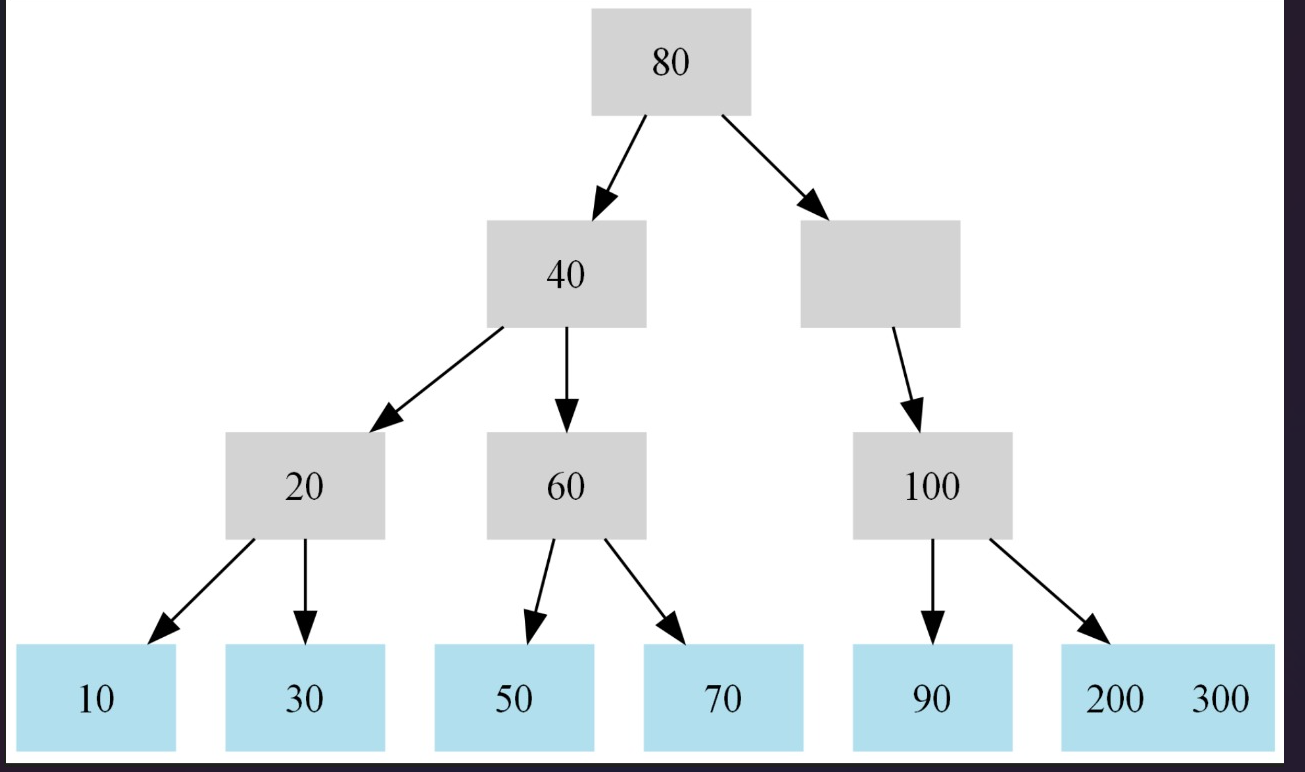

## Visualization of B+ Tree Structure

The figure below shows the B+ Tree constructed from the keys present in the database table:

### Key Characteristics of the Tree

- **Internal Nodes** (shown in gray) contain only keys to guide the search process and do not store actual data.
- **Leaf Nodes** (shown in blue) contain the actual data entries.
- All leaf nodes are at the **same level**, maintaining the balanced property of the B+ Tree.
- Keys in the leaf nodes are **sorted** to support efficient range queries.
- The structure accurately reflects a B+ Tree of order 3 (or similar), maintaining correct node capacities and hierarchical relationships.

This visualization confirms the correctness of the B+ Tree indexing structure used to organize the database records.


## Conclusion

This project successfully implements a B+ Tree-based database system in Python, designed to support core operations such as **insertion**, **deletion**, **search**, and **range queries**. The system maintains a balanced hierarchical structure, ensuring efficient performance and predictable time complexities for all supported operations.

A key design principle of the B+ Tree — the separation of internal nodes (for navigation) and leaf nodes (for actual data storage) — was faithfully implemented. This distinction facilitates optimized traversal and consistent data access. Furthermore, the linked structure of the leaf nodes enables fast, sequential access during range queries, which is essential for real-world database applications.

To enhance transparency and understanding, the system includes **visual representations** of the B+ Tree during operations such as node splitting and merging. These visual outputs help illustrate the dynamic behavior of the tree as it adapts to data changes, reinforcing key theoretical concepts.

Overall, this project not only demonstrates a practical application of **B+ Tree theory**, but also highlights the importance of balanced tree structures in the design of scalable and efficient database systems. It lays a strong foundation for future exploration into advanced **indexing techniques**, **query optimization**, and **persistent storage models** in database engineering.
